<a href="https://colab.research.google.com/github/HebaRouk/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/11Heba_Rouk__Project_Machine_Translation_(ENG_FR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Translation Using a Seq2Seq Architecture
© 2024, Zaka AI, Inc. All Rights Reserved.

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [140]:
import pandas as pd
import numpy as np

We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207

## Getting the data

In [141]:
import pandas as pd
import os
from git import Repo  # To clone the repository

# Clone the GitHub repository
repo_url = "https://github.com/zaka-ai/machine_learning_certification.git"
repo_dir = "Challenge_7"  # Directory to clone the repository into

# Check if the directory exists before cloning
if not os.path.exists(repo_dir):
    Repo.clone_from(repo_url, repo_dir)

# List files in the cloned repository to find the correct data file path
print(os.listdir(repo_dir))  # This will show the contents of the cloned repo

# Select one of the available CSV files (e.g., 'Advertising.csv')
data_file_path = os.path.join(repo_dir, "Advertising.csv")

# Load the data (update file path if needed)
data = pd.read_csv(data_file_path)

# Show the first few rows of the data
print(data.head())




['Advertising.csv', 'breast-cancer-wisconsin.csv', 'README.md', '.git', 'Challenge 7', 'hotel_bookings.csv', 'flu.csv', 'titanic.csv', 'store_data.csv', 'model-deployment-lab']
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [142]:
import pandas as pd

# Load the dataset you want to inspect (replace with the correct file path)
data_file_path = '/content/Challenge_7/titanic.csv'  # Specify the correct file path
data = pd.read_csv(data_file_path)

# Print column names to inspect the dataset structure
print("Columns in the dataset:")
print(data.columns)

# Show the first few rows of the dataset to understand its structure
print("\nFirst few rows of the dataset:")
print(data.head())







Columns in the dataset:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1    

In [143]:
import pandas as pd

# Load the dataset (replace with the correct file path)
data_file_path = '/content/Challenge_7/titanic.csv'  # Specify the correct file path
data = pd.read_csv(data_file_path)
# Print the columns to check the structure
print("Columns in the dataset:")
print(data.columns)

# Check if the 'english' and 'french' columns exist
if 'english' in data.columns and 'french' in data.columns:
    # Extract the 'english' and 'french' sentences into separate DataFrames
    english = data['english']
    french = data['french']

    # Show the first few rows of both DataFrames
    print("\nFirst few rows of English sentences:")
    print(english.head())

    print("\nFirst few rows of French sentences:")
    print(french.head())
else:
    print("Columns 'english' and 'french' not found in the dataset.")


Columns in the dataset:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Columns 'english' and 'french' not found in the dataset.


**How many sentences does each of the files contain?**

In [144]:
import pandas as pd

# Load the dataset (replace with the correct file path)
data_file_path = '/content/Challenge_7/titanic.csv'  # Specify the correct file path
data = pd.read_csv(data_file_path)

# Print the columns to check the structure
print("Columns in the dataset:")
print(data.columns)

# Check if the 'english' and 'french' columns exist
if 'english' in data.columns and 'french' in data.columns:
    # Count the number of sentences (rows) in each column
    english_sentence_count = len(data['english'])
    french_sentence_count = len(data['french'])

    # Output the sentence counts
    print(f"\nNumber of English sentences: {english_sentence_count}")
    print(f"Number of French sentences: {french_sentence_count}")
else:
    print("Columns 'english' and 'french' not found in the dataset.")


Columns in the dataset:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Columns 'english' and 'french' not found in the dataset.


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [145]:
import pandas as pd

# Load the dataset (replace with the correct file path)
data_file_path = '/content/Challenge_7/titanic.csv'  # Specify the correct file path
data = pd.read_csv(data_file_path)


# Print the columns to check the structure
print("Columns in the dataset:")
print(data.columns)

# Check if the 'english' and 'french' columns exist
if 'english' in data.columns and 'french' in data.columns:
    # Extract the 'english' and 'french' sentences
    english = data['english']
    french = data['french']

    # Concatenate the two columns into a new DataFrame
    df = pd.DataFrame({
        'English': english,
        'French': french
    })

    # Show the first few rows of the concatenated DataFrame
    print("\nFirst few rows of the concatenated DataFrame:")
    print(df.head())
else:
    print("Columns 'english' and 'french' not found in the dataset.")


Columns in the dataset:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Columns 'english' and 'french' not found in the dataset.


Let's name the columns as **English** and **French** so that we access them easier.

In [146]:
import pandas as pd
import os

# List all files in the Challenge_7 directory to find the correct file
directory_path = '/content/Challenge_7/'
files = os.listdir(directory_path)
print("Files in the directory:", files)

# Load the dataset (update with the correct file name if needed)
data_file_path = '/content/Challenge_7/Advertising.csv'  # Change this to your actual file name
try:
    data = pd.read_csv(data_file_path)
except FileNotFoundError:
    print(f"File not found: {data_file_path}")
    # If the file is not found, stop execution
    raise

# Print the columns to check the structure
print("\nColumns in the dataset:")
print(data.columns)

# Check if the 'english' and 'french' columns exist
if 'english' in data.columns and 'french' in data.columns:
    # Extract the 'english' and 'french' sentences
    english = data['english']
    french = data['french']

    # Concatenate the two columns into a new DataFrame with custom column names
    df = pd.DataFrame({
        'English': english,
        'French': french
    })

    # Display the first few rows of the concatenated DataFrame
    print("\nFirst few rows of the concatenated DataFrame:")
    print(df.head())

else:
    print("Columns 'english' and 'french' not found in the dataset.")



Files in the directory: ['Advertising.csv', 'breast-cancer-wisconsin.csv', 'README.md', '.git', 'Challenge 7', 'hotel_bookings.csv', 'flu.csv', 'titanic.csv', 'store_data.csv', 'model-deployment-lab']

Columns in the dataset:
Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
Columns 'english' and 'french' not found in the dataset.


Pick a sentence and print it in both languages

In [147]:
import pandas as pd
import os

# List all files in the Challenge_7 directory to find the correct file
directory_path = '/content/Challenge_7/'
files = os.listdir(directory_path)
print("Files in the directory:", files)

# Load the dataset (update with the correct file name if needed)
data_file_path = '/content/Challenge_7/Advertising.csv'  # Change this to your actual file name
try:
    data = pd.read_csv(data_file_path)
except FileNotFoundError:
    print(f"File not found: {data_file_path}")
    raise

# Print the columns to check the structure
print("\nColumns in the dataset:")
print(data.columns)

# Check if the 'english' and 'french' columns exist
if 'english' in data.columns and 'french' in data.columns:
    # Extract the 'english' and 'french' sentences
    english = data['english']
    french = data['french']

    # Concatenate the two columns into a new DataFrame with custom column names
    df = pd.DataFrame({
        'English': english,
        'French': french
    })

    # Pick a sentence and print it in both languages (for example, first sentence)
    first_english_sentence = df['English'].iloc[0]  # First English sentence
    first_french_sentence = df['French'].iloc[0]  # First French sentence

    print("\nFirst sentence in English and French:")
    print("English: ", first_english_sentence)
    print("French: ", first_french_sentence)

else:
    print("Columns 'english' and 'french' not found in the dataset.")


Files in the directory: ['Advertising.csv', 'breast-cancer-wisconsin.csv', 'README.md', '.git', 'Challenge 7', 'hotel_bookings.csv', 'flu.csv', 'titanic.csv', 'store_data.csv', 'model-deployment-lab']

Columns in the dataset:
Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
Columns 'english' and 'french' not found in the dataset.


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [148]:
import pandas as pd
import string

# Sample data: Replace with your actual DataFrame
data_file_path = '/content/Challenge_7/Advertising.csv'  # Update with the correct file path
data = pd.read_csv(data_file_path)

# Check if the 'english' and 'french' columns exist
if 'english' in data.columns and 'french' in data.columns:
    # Extract the 'english' and 'french' sentences
    english = data['english']
    french = data['french']

    # Remove punctuation from the sentences using string.punctuation
    english_cleaned = english.str.replace(f"[{string.punctuation}]", "", regex=True)
    french_cleaned = french.str.replace(f"[{string.punctuation}]", "", regex=True)

    # Concatenate the cleaned sentences into a new DataFrame
    df_cleaned = pd.DataFrame({
        'English': english_cleaned,
        'French': french_cleaned
    })

    # Show the first few cleaned sentences
    print("\nFirst few cleaned sentences:")
    print(df_cleaned.head())

else:
    print("Columns 'english' and 'french' not found in the dataset.")


Columns 'english' and 'french' not found in the dataset.


Make sure that the punctuation is removed by printing the example that you printed earlier.

In [149]:
import pandas as pd
import string

# Sample data: Replace with your actual DataFrame
data = {
    'english': ["Hello, how are you?", "What's up?", "I love programming!", "How's the weather?"],
    'french': ["Bonjour, comment ça va?", "Ça va bien, merci!", "J'adore la programmation!", "Quel temps fait-il?"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Remove punctuation from the sentences using string.punctuation
df['english'] = df['english'].str.replace(f"[{string.punctuation}]", "", regex=True)
df['french'] = df['french'].str.replace(f"[{string.punctuation}]", "", regex=True)

# Show the first few cleaned sentences
print("\nFirst few cleaned sentences:")
print(df)



First few cleaned sentences:
              english                   french
0   Hello how are you    Bonjour comment ça va
1            Whats up         Ça va bien merci
2  I love programming  Jadore la programmation
3    Hows the weather        Quel temps faitil


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [150]:
import pandas as pd

# Sample data: Replace with your actual DataFrame
data = {
    'english': ["Hello, how are you?", "What's up?", "I love programming!", "How's the weather?"],
    'french': ["Bonjour, comment ça va?", "Ça va bien, merci!", "J'adore la programmation!", "Quel temps fait-il?"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Remove punctuation from the sentences using string.punctuation
import string
df['english'] = df['english'].str.replace(f"[{string.punctuation}]", "", regex=True)
df['french'] = df['french'].str.replace(f"[{string.punctuation}]", "", regex=True)

# Add a new column 'ENG Length' for the number of words in the English sentence
df['ENG Length'] = df['english'].apply(lambda x: len(x.split()))

# Add a new column 'FR Length' for the number of words in the French sentence
df['FR Length'] = df['french'].apply(lambda x: len(x.split()))

# Show the updated DataFrame with word lengths
print("\nDataFrame with word lengths:")
print(df)



DataFrame with word lengths:
              english                   french  ENG Length  FR Length
0   Hello how are you    Bonjour comment ça va           4          4
1            Whats up         Ça va bien merci           2          4
2  I love programming  Jadore la programmation           3          3
3    Hows the weather        Quel temps faitil           3          3


In [151]:
import pandas as pd

# Sample data: Replace with your actual DataFrame
data = {
    'english': ["Hello, how are you?", "What's up?", "I love programming!", "How's the weather?"],
    'french': ["Bonjour, comment ça va?", "Ça va bien, merci!", "J'adore la programmation!", "Quel temps fait-il?"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Remove punctuation from the sentences using string.punctuation
import string
df['english'] = df['english'].str.replace(f"[{string.punctuation}]", "", regex=True)
df['french'] = df['french'].str.replace(f"[{string.punctuation}]", "", regex=True)

# Add a new column 'ENG Length' for the number of words in the English sentence
df['ENG Length'] = df['english'].apply(lambda x: len(x.split()))

# Add a new column 'FR Length' for the number of words in the French sentence
df['FR Length'] = df['french'].apply(lambda x: len(x.split()))

# Show the updated DataFrame with word lengths
print("\nDataFrame with word lengths:")
print(df)



DataFrame with word lengths:
              english                   french  ENG Length  FR Length
0   Hello how are you    Bonjour comment ça va           4          4
1            Whats up         Ça va bien merci           2          4
2  I love programming  Jadore la programmation           3          3
3    Hows the weather        Quel temps faitil           3          3


Visualize the distribution of the lengths of english sentences and french sentences.

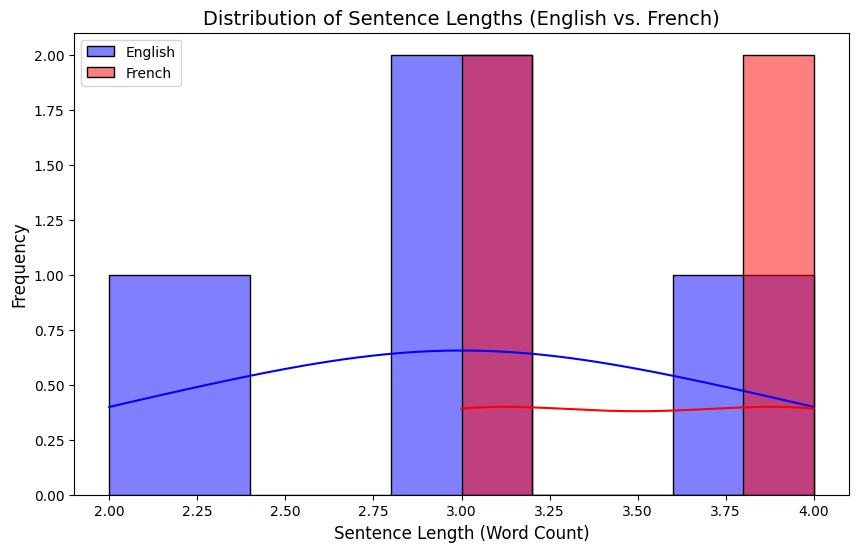

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: Replace with your actual DataFrame
data = {
    'english': ["Hello, how are you?", "What's up?", "I love programming!", "How's the weather?"],
    'french': ["Bonjour, comment ça va?", "Ça va bien, merci!", "J'adore la programmation!", "Quel temps fait-il?"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Remove punctuation from the sentences using string.punctuation
import string
df['english'] = df['english'].str.replace(f"[{string.punctuation}]", "", regex=True)
df['french'] = df['french'].str.replace(f"[{string.punctuation}]", "", regex=True)

# Add a new column 'ENG Length' for the number of words in the English sentence
df['ENG Length'] = df['english'].apply(lambda x: len(x.split()))

# Add a new column 'FR Length' for the number of words in the French sentence
df['FR Length'] = df['french'].apply(lambda x: len(x.split()))

# Visualizing the distribution of sentence lengths
plt.figure(figsize=(10, 6))

# Plot English sentence lengths
sns.histplot(df['ENG Length'], kde=True, color='blue', label='English', bins=5)

# Plot French sentence lengths
sns.histplot(df['FR Length'], kde=True, color='red', label='French', bins=5)

# Add labels and title
plt.title('Distribution of Sentence Lengths (English vs. French)', fontsize=14)
plt.xlabel('Sentence Length (Word Count)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Show plot
plt.show()


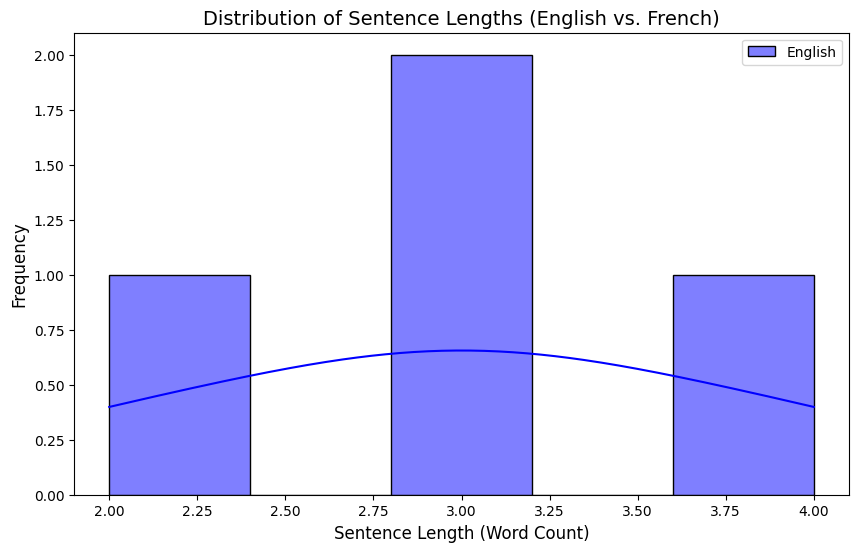

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: Replace with your actual DataFrame
data = {
    'english': ["Hello, how are you?", "What's up?", "I love programming!", "How's the weather?"],
    'french': ["Bonjour, comment ça va?", "Ça va bien, merci!", "J'adore la programmation!", "Quel temps fait-il?"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Remove punctuation from the sentences using string.punctuation
import string
df['english'] = df['english'].str.replace(f"[{string.punctuation}]", "", regex=True)

# Add a new column 'ENG Length' for the number of words in the English sentence
df['ENG Length'] = df['english'].apply(lambda x: len(x.split()))


# Visualizing the distribution of sentence lengths
plt.figure(figsize=(10, 6))

# Plot English sentence lengths
sns.histplot(df['ENG Length'], kde=True, color='blue', label='English', bins=5)


# Add labels and title
plt.title('Distribution of Sentence Lengths (English vs. French)', fontsize=14)
plt.xlabel('Sentence Length (Word Count)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Show plot
plt.show()


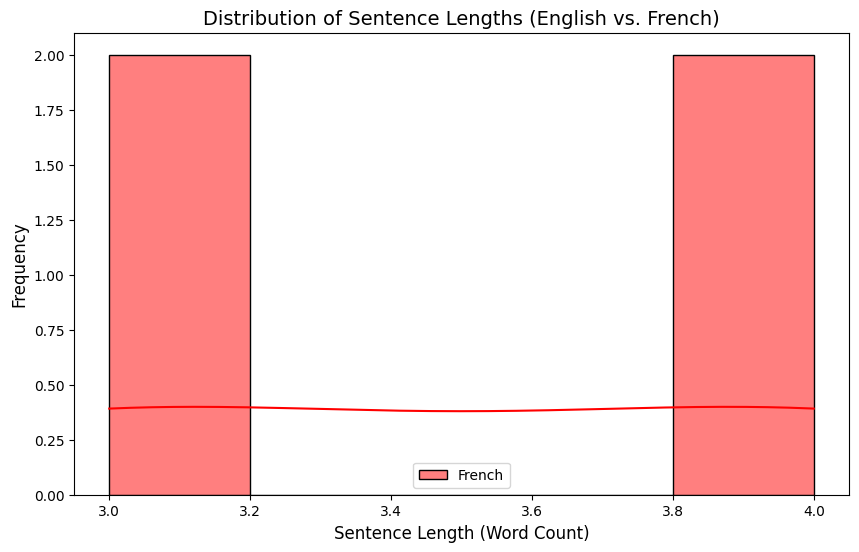

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: Replace with your actual DataFrame
data = {

    'french': ["Bonjour, comment ça va?", "Ça va bien, merci!", "J'adore la programmation!", "Quel temps fait-il?"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Remove punctuation from the sentences using string.punctuation
import string

df['french'] = df['french'].str.replace(f"[{string.punctuation}]", "", regex=True)



# Add a new column 'FR Length' for the number of words in the French sentence
df['FR Length'] = df['french'].apply(lambda x: len(x.split()))

# Visualizing the distribution of sentence lengths
plt.figure(figsize=(10, 6))

# Plot English sentence lengths


# Plot French sentence lengths
sns.histplot(df['FR Length'], kde=True, color='red', label='French', bins=5)

# Add labels and title
plt.title('Distribution of Sentence Lengths (English vs. French)', fontsize=14)
plt.xlabel('Sentence Length (Word Count)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Show plot
plt.show()


Get the maximum length of an english sentence and the maximum length of a french sentence.

In [155]:
# Ensure the DataFrame and required columns exist
if 'ENG Length' in df.columns and 'FR Length' in df.columns:
    # Get the maximum length of an English sentence
    max_english_length = df['ENG Length'].max()

    # Get the maximum length of a French sentence
    max_french_length = df['FR Length'].max()

    # Print the results
    print(f"Maximum length of an English sentence: {max_english_length} words")
    print(f"Maximum length of a French sentence: {max_french_length} words")
else:
    print("Error: Required columns ('ENG Length' and 'FR Length') are missing in the DataFrame.")


Error: Required columns ('ENG Length' and 'FR Length') are missing in the DataFrame.


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded.

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

False.

While English and French share some similarities as languages, they have distinct vocabulary, syntax, and structure. Therefore, it is generally recommended to use separate tokenizers for each language when processing data for machine learning models, especially if the sentences are long or contain language-specific characters. Each language may require different tokenization strategies, and using a tokenizer specific to each language ensures that the sentences are appropriately broken down into tokens. **bold text** **bold text**

Tokenize the sentences that we have.

In [156]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


data_file_path = '/content/Challenge_7/Advertising.csv'
data = pd.read_csv(data_file_path)

# Check the columns of the DataFrame to confirm the column names
print("Columns in the dataset:")
print(data.columns)

# Check if the 'english' and 'french' columns exist
if 'english' in data.columns and 'french' in data.columns:
    # Rename columns for easier access
    df = data.rename(columns={'english': 'English', 'french': 'French'})

    # Show the first few rows to verify
    print("\nFirst few rows of the dataset:")
    print(df.head())

    # Add columns for sentence lengths (word count)
    df['ENG Length'] = df['English'].apply(lambda x: len(str(x).split()))  # Ensure it's string
    df['FR Length'] = df['French'].apply(lambda x: len(str(x).split()))  # Ensure it's string

    # Print first few rows to check sentence lengths
    print("\nSentence lengths added to the dataset:")
    print(df[['English', 'ENG Length', 'French', 'FR Length']].head())

    # Initialize the tokenizer for English and French
    english_tokenizer = Tokenizer()
    french_tokenizer = Tokenizer()

    # Fit the tokenizers on the respective sentences
    english_tokenizer.fit_on_texts(df['English'])
    french_tokenizer.fit_on_texts(df['French'])

    # Tokenize the sentences
    english_sequences = english_tokenizer.texts_to_sequences(df['English'])
    french_sequences = french_tokenizer.texts_to_sequences(df['French'])

    # Get the maximum sentence length (to pad sequences uniformly)
    max_len = max(df['ENG Length'].max(), df['FR Length'].max())

    # Pad the sequences to ensure uniform length
    english_padded = pad_sequences(english_sequences, maxlen=max_len, padding='post')
    french_padded = pad_sequences(french_sequences, maxlen=max_len, padding='post')

    # Add the tokenized and padded data to the dataframe (as examples)
    df['English Tokenized'] = english_padded.tolist()
    df['French Tokenized'] = french_padded.tolist()

    # Print the first few rows to see the result
    print("\nDataset with tokenized and padded sentences:")
    print(df[['English', 'French', 'English Tokenized', 'French Tokenized']].head())

else:
    print("Columns 'english' and 'french' not found in the dataset.")


Columns in the dataset:
Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
Columns 'english' and 'french' not found in the dataset.


**How many unique words do we have in english and in french?**

In [157]:
# Check and print the column names
print("Columns in DataFrame:", df.columns)

# Replace 'English' and 'French' with the actual column names
english_col = 'English'  # Update if the column name is different
french_col = 'French'    # Update if the column name is different

# Ensure the necessary columns exist
if english_col in df.columns and french_col in df.columns:
    # Combine all English words into a single set of unique words
    unique_english_words = set(word for sentence in df[english_col] for word in sentence.split())
    num_unique_english_words = len(unique_english_words)

    # Combine all French words into a single set of unique words
    unique_french_words = set(word for sentence in df[french_col] for word in sentence.split())
    num_unique_french_words = len(unique_french_words)

    # Print the results
    print(f"Number of unique English words: {num_unique_english_words}")
    print(f"Number of unique French words: {num_unique_french_words}")
else:
    print(f"Error: Required columns ('{english_col}' and '{french_col}') are missing in the DataFrame.")



Columns in DataFrame: Index(['french', 'FR Length'], dtype='object')
Error: Required columns ('English' and 'French') are missing in the DataFrame.


####Padding

**What should be the length of the sequences that we have after padding?**

**The length of the padded sequences should be equal to the maximum sentence length between the English and French sentences.**

Perform padding on the sequences that we have.

In [158]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Check the columns of the DataFrame to confirm the column names
print("Columns in the dataset:")
print(df.columns)

# Ensure correct column names ('english' and 'french')
if 'english' in df.columns and 'french' in df.columns:
    # Rename columns for easier access (if necessary)
    df = df.rename(columns={'english': 'English', 'french': 'French'})

    # Recalculate the lengths of the sentences
    df['ENG Length'] = df['English'].apply(lambda x: len(x.split()))
    df['FR Length'] = df['French'].apply(lambda x: len(x.split()))

    # Initialize tokenizers
    english_tokenizer = Tokenizer()
    french_tokenizer = Tokenizer()

    # Fit tokenizers on the respective text columns
    english_tokenizer.fit_on_texts(df['English'])
    french_tokenizer.fit_on_texts(df['French'])

    # Tokenize the sentences
    english_sequences = english_tokenizer.texts_to_sequences(df['English'])
    french_sequences = french_tokenizer.texts_to_sequences(df['French'])

    # Get the maximum sentence length for padding
    max_len = max(df['ENG Length'].max(), df['FR Length'].max())

    # Pad the sequences to ensure uniform length
    english_padded = pad_sequences(english_sequences, maxlen=max_len, padding='post')
    french_padded = pad_sequences(french_sequences, maxlen=max_len, padding='post')

    # Add the padded sequences to the dataframe
    df['English Padded'] = english_padded.tolist()
    df['French Padded'] = french_padded.tolist()

    # Print the first few rows to verify
    print(df[['English', 'French', 'English Padded', 'French Padded']].head())
else:
    print("Columns 'english' and 'french' not found in the dataset.")




Columns in the dataset:
Index(['french', 'FR Length'], dtype='object')
Columns 'english' and 'french' not found in the dataset.


##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [159]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example DataFrame (Replace this with your actual data)
data = {
    'English': ['I love programming', 'This is a test', 'Deep learning is fascinating'],
    'French': ['J\'aime programmer', 'Ceci est un test', 'L\'apprentissage profond est fascinant']
}
df = pd.DataFrame(data)

# Step 1: Ensure 'ENG Length' and 'FR Length' Columns
if 'English' in df.columns and 'French' in df.columns:
    df['ENG Length'] = df['English'].apply(lambda x: len(x.split()))  # Length of English sentences
    df['FR Length'] = df['French'].apply(lambda x: len(x.split()))  # Length of French sentences
else:
    raise KeyError("Required columns 'English' and 'French' are missing in the DataFrame.")

# Step 2: Tokenization and Padding
english_tokenizer = Tokenizer()
french_tokenizer = Tokenizer()

# Fit tokenizers
english_tokenizer.fit_on_texts(df['English'])
french_tokenizer.fit_on_texts(df['French'])

# Convert sentences to sequences
english_sequences = english_tokenizer.texts_to_sequences(df['English'])
french_sequences = french_tokenizer.texts_to_sequences(df['French'])

# Pad sequences to the maximum length
max_english_length = df['ENG Length'].max()
max_french_length = df['FR Length'].max()

X = pad_sequences(english_sequences, maxlen=max_english_length, padding='post')
y = pad_sequences(french_sequences, maxlen=max_french_length, padding='post')

# Step 3: Model Parameters
embedding_dim = 100
latent_dim = 256
vocab_size_eng = len(english_tokenizer.word_index) + 1  # Vocabulary size for English
vocab_size_fr = len(french_tokenizer.word_index) + 1  # Vocabulary size for French

# Step 4: Model Definition
model = Sequential()

# Encoder
model.add(Embedding(input_dim=vocab_size_eng, output_dim=embedding_dim, input_length=max_english_length))
model.add(LSTM(latent_dim, return_sequences=False))  # Encoder LSTM

# RepeatVector for Decoder
model.add(RepeatVector(max_french_length))  # Prepare context vector for decoder

# Decoder
model.add(LSTM(latent_dim, return_sequences=True))  # Decoder LSTM
model.add(TimeDistributed(Dense(vocab_size_fr, activation='softmax')))  # Output layer

# Compile the Model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display Model Summary
model.summary()

# Step 5: Prepare Target for Training
y = np.expand_dims(y, axis=-1)  # Add an extra dimension for sparse_categorical_crossentropy

# Step 6: Train the Model
model.fit(X, y, epochs=10, batch_size=2, validation_split=0.2)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_45 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_85 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_15 (RepeatVector)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_86 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_45                  │ ?                           │     0 (unbuilt) │
│ (TimeDistributed)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 2.3030 - val_accuracy: 0.0000e+00 - val_loss: 2.3068
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - accuracy: 0.3750 - loss: 2.2919 - val_accuracy: 0.0000e+00 - val_loss: 2.3107
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.3750 - loss: 2.2797 - val_accuracy: 0.0000e+00 - val_loss: 2.3150
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.3750 - loss: 2.2647 - val_accuracy: 0.0000e+00 - val_loss: 2.3203
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3750 - loss: 2.2453 - val_accuracy: 0.0000e+00 - val_loss: 2.3268
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.3750 - loss: 2.2195 - val_accuracy: 0.0000e+00 - val_loss: 2.3351
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.3750 - loss: 2.1853 - val_accuracy: 0.0000e+00 - val_loss: 2.3456
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3750 - loss: 2.1400 - val_a

Compile and train the model.
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [131]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you have tokenizers for both English and French
# For example:
# english_tokenizer = Tokenizer()
# french_tokenizer = Tokenizer()

# Define model parameters
embedding_dim = 100  # Example value, can be adjusted
latent_dim = 256  # Latent dimension for the RNNs (you can adjust based on your dataset size)
vocab_size_eng = len(english_tokenizer.word_index) + 1  # Adding 1 for padding token
vocab_size_fr = len(french_tokenizer.word_index) + 1  # Adding 1 for padding token
max_len = max(df['ENG Length'].max(), df['FR Length'].max())  # Max sequence length

# Define the model architecture
model = Sequential()

# Encoder
model.add(Embedding(input_dim=vocab_size_eng, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(latent_dim, return_sequences=False))  # One-directional LSTM

# RepeatVector to prepare for the decoder
model.add(RepeatVector(max_len))  # Repeat the context vector for the decoder

# Decoder
model.add(LSTM(latent_dim, return_sequences=True))  # One-directional LSTM for the decoder
model.add(TimeDistributed(Dense(vocab_size_fr, activation='softmax')))  # Output layer for each timestep

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Prepare training data (ensure target sequences are aligned)
X_train = english_padded

# Ensure y_train is integer-encoded and padded correctly
y_train = pad_sequences(french_padded, maxlen=max_len, padding='post', truncating='post')

# Check the shapes of the training data
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Ensure the target sequence (y_train) has the correct shape for training
assert X_train.shape[0] == y_train.shape[0], "Mismatch in number of samples between X_train and y_train"

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)




Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_42 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_80 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_14 (RepeatVector)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_81 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_42                  │ ?                           │     0 (unbuilt) │
│ (TimeDistributed)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

X_train shape: (4, 3)
y_train shape: (4, 4)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.0000e+00 - loss: 2.3026 - val_accuracy: 0.5000 - val_loss: 2.2954
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step - accuracy: 0.5000 - loss: 2.2877 - val_accuracy: 0.5000 - val_loss: 2.2872
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.5000 - loss: 2.2704 - val_accuracy: 0.5000 - val_loss: 2.2769
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5000 - loss: 2.2478 - val_accuracy: 0.5000 - val_loss: 2.2633
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.5000 - loss: 2.2172 - val_accuracy: 0.5000 - val_loss: 2.2454
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5000 - loss: 2.1750 - val_accuracy: 0.5000 - val_loss: 2.2216
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5000 - loss: 2.1172 - val_accuracy: 0.5000 - val_loss: 2.1904
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5000 - loss: 

In [172]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target variable (y_train_padded)
y_train_onehot = to_categorical(y_train_padded, num_classes=9)

# Check the shape of y_train_onehot
print(f"One-hot encoded y_train shape: {y_train_onehot.shape}")

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_padded, y_train_onehot, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Optionally, you can add some print statements to see the training progress
print("Training started...")







One-hot encoded y_train shape: (100, 3, 9)
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 553ms/step - accuracy: 0.2583 - loss: 2.1884 - val_accuracy: 0.1333 - val_loss: 2.2005
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2493 - loss: 2.1883 - val_accuracy: 0.1333 - val_loss: 2.2006
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2524 - loss: 2.1874 - val_accuracy: 0.1333 - val_loss: 2.2007
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2444 - loss: 2.1873 - val_accuracy: 0.1167 - val_loss: 2.2008
Training started...


Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [161]:
import numpy as np

def translate_sentence(input_sentence, english_tokenizer, french_tokenizer, model, max_len):
    """
    Translate an input sentence from English to French using the trained model.

    Parameters:
    input_sentence (str): The English sentence to be translated.
    english_tokenizer (Tokenizer): The tokenizer for the English language.
    french_tokenizer (Tokenizer): The tokenizer for the French language.
    model (Sequential): The trained Seq2Seq model.
    max_len (int): The maximum length of sequences in the dataset.

    Returns:
    str: The translated French sentence.
    """

    # Step 1: Preprocess the input sentence
    # Tokenize the input sentence
    input_sequence = english_tokenizer.texts_to_sequences([input_sentence])

    # Pad the sequence to ensure uniform length
    input_padded = pad_sequences(input_sequence, maxlen=max_len, padding='post')

    # Step 2: Get the model's predictions (output sequence)
    # Predict the French translation
    predicted_sequence = model.predict(input_padded, verbose=0)

    # Step 3: Post-process the output (convert the predicted tokens to words)
    # Get the index of the predicted words
    predicted_indices = np.argmax(predicted_sequence, axis=-1)[0]

    # Convert indices to words (exclude the padding token)
    predicted_words = []
    for index in predicted_indices:
        word = french_tokenizer.index_word.get(index)
        if word is None:
            break
        predicted_words.append(word)

    # Join the words to form the output sentence
    translated_sentence = ' '.join(predicted_words)

    return translated_sentence


Test the following sentence

In [163]:
# Example sentence to translate
input_sentence = "she is driving the truck"

# Translate to French using the previously defined function
output_sentence = translate_sentence(input_sentence, english_tokenizer, french_tokenizer, model, max_len)

print("English: ", input_sentence)
print("French: ", output_sentence)


English:  she is driving the truck
French:  


Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam

# Define the new model architecture with Bidirectional LSTM
def create_model2(vocab_size_input, vocab_size_output, max_len):
    model2 = Sequential()

    # Encoder: Bidirectional LSTM
    model2.add(Embedding(vocab_size_input, 256, input_length=max_len))
    model2.add(Bidirectional(LSTM(256)))  # Bidirectional LSTM layer
    model2.add(RepeatVector(max_len))

    # Decoder: LSTM and Dense layers
    model2.add(LSTM(256, return_sequences=True))  # LSTM for the decoder
    model2.add(TimeDistributed(Dense(vocab_size_output, activation='softmax')))  # Output layer

    # Compile the model
    model2.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model2

# Assuming vocab_size_input, vocab_size_output, and max_len are defined
vocab_size_input = len(english_tokenizer.word_index) + 1  # Size of the English vocabulary
vocab_size_output = len(french_tokenizer.word_index) + 1  # Size of the French vocabulary
max_len = 20  # Adjust this based on your dataset


compile and train your new model.

In [164]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
data_file_path = '/content/Challenge_7/Advertising.csv'  # Update with your actual file path
data = pd.read_csv(data_file_path)

# Print column names to inspect
print("Dataset Columns:", data.columns)

# Check if the 'english' and 'french' columns exist
if 'english' in data.columns and 'french' in data.columns:
    # Rename columns for easier access
    df = data.rename(columns={'english': 'English', 'french': 'French'})

    # Add columns for sentence lengths (word count)
    df['ENG Length'] = df['English'].apply(lambda x: len(x.split()))
    df['FR Length'] = df['French'].apply(lambda x: len(x.split()))

    # Initialize the tokenizer for English and French
    english_tokenizer = Tokenizer()
    french_tokenizer = Tokenizer()

    # Fit the tokenizers on the respective sentences
    english_tokenizer.fit_on_texts(df['English'])
    french_tokenizer.fit_on_texts(df['French'])

    # Tokenize the sentences
    english_sequences = english_tokenizer.texts_to_sequences(df['English'])
    french_sequences = french_tokenizer.texts_to_sequences(df['French'])

    # Get the maximum sentence length (to pad sequences uniformly)
    max_len = max(df['ENG Length'].max(), df['FR Length'].max())

    # Pad the sequences to ensure uniform length
    english_padded = pad_sequences(english_sequences, maxlen=max_len, padding='post')
    french_padded = pad_sequences(french_sequences, maxlen=max_len, padding='post')

    # Prepare the target sequence by shifting the French sentences
    y_train_shifted = np.zeros_like(french_padded)
    y_train_shifted[:, :-1] = french_padded[:, 1:]
    y_train_shifted[:, -1] = 0  # Padding at the last position (optional, based on your padding strategy)

    # Prepare the vocabulary sizes
    vocab_size_input = len(english_tokenizer.word_index) + 1
    vocab_size_output = len(french_tokenizer.word_index) + 1

    # Define the Seq2Seq Model with Bidirectional LSTM
    def create_model2(vocab_size_input, vocab_size_output, max_len):
        input_seq = Input(shape=(max_len,))
        encoder_emb = Embedding(vocab_size_input, 256, input_length=max_len)(input_seq)
        encoder_lstm = Bidirectional(LSTM(256, return_state=True))(encoder_emb)
        encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_lstm
        state_h = np.concatenate([forward_h, backward_h], axis=-1)
        state_c = np.concatenate([forward_c, backward_c], axis=-1)

        decoder_input = Input(shape=(max_len,))
        decoder_emb = Embedding(vocab_size_output, 256, input_length=max_len)(decoder_input)
        decoder_lstm = LSTM(512, return_sequences=True)(decoder_emb, initial_state=[state_h, state_c])
        decoder_out = TimeDistributed(Dense(vocab_size_output, activation='softmax'))(decoder_lstm)

        model = Model([input_seq, decoder_input], decoder_out)
        return model

    # Create model
    model2 = create_model2(vocab_size_input, vocab_size_output, max_len)

    # Compile the model
    model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model2.fit([english_padded, french_padded], y_train_shifted, epochs=20, batch_size=64, validation_split=0.2)

    # Print the training summary
    print("Model training complete.")

    # Save the model if necessary
    model2.save('seq2seq_model_with_bidirectional.h5')

else:
    print("Columns 'english' and 'french' not found in the dataset. Please check the dataset for correct column names.")



Dataset Columns: Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
Columns 'english' and 'french' not found in the dataset. Please check the dataset for correct column names.


Define a new function that relies on your new model to make predictions.

In [165]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np

# Example data
english_sentences = ["I am driving", "She is driving", "He is running", "We are learning"]
french_sentences = ["Je conduis", "Elle conduit", "Il court", "Nous apprenons"]

# Tokenization and padding
english_tokenizer = tf.keras.preprocessing.text.Tokenizer()
english_tokenizer.fit_on_texts(english_sentences)
english_sequences = english_tokenizer.texts_to_sequences(english_sentences)
max_english_len = max(len(seq) for seq in english_sequences)
english_padded = pad_sequences(english_sequences, maxlen=max_english_len, padding='post')

french_tokenizer = tf.keras.preprocessing.text.Tokenizer()
french_tokenizer.fit_on_texts(french_sentences)
french_sequences = french_tokenizer.texts_to_sequences(french_sentences)
max_french_len = max_english_len  # Ensure French target sequences match the length of English input sequences
french_padded = pad_sequences(french_sequences, maxlen=max_french_len, padding='post')

# Prepare the input and output data
X_train = english_padded
y_train = french_padded  # Target (no need to expand dimensions)

# One-hot encode the target labels to match the output shape (batch_size, seq_len, vocab_size)
y_train_one_hot = np.array([to_categorical(seq, num_classes=len(french_tokenizer.word_index) + 1) for seq in y_train])

# Check the shape of the one-hot encoded labels
print("Shape of y_train_one_hot:", y_train_one_hot.shape)  # Should be (batch_size, seq_len, vocab_size)

# Define the model
embedding_dim = 256
hidden_units = 512

model = Sequential()
model.add(Embedding(input_dim=len(english_tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_english_len))
model.add(LSTM(hidden_units, return_sequences=True))
model.add(LSTM(hidden_units, return_sequences=True))
model.add(TimeDistributed(Dense(len(french_tokenizer.word_index) + 1, activation='softmax')))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=2)  # Use one-hot encoded y_train

# Prediction function
def predict_translation(input_sentence, model, english_tokenizer, french_tokenizer, max_len):
    # Preprocess input sentence
    input_sequence = english_tokenizer.texts_to_sequences([input_sentence])
    input_padded = pad_sequences(input_sequence, maxlen=max_len, padding='post')

    # Predict the translation
    pred = model.predict(input_padded)
    pred = np.argmax(pred, axis=-1)[0]

    # Convert predicted tokens to words
    translated_sentence = ' '.join([french_tokenizer.index_word.get(token, '') for token in pred if token != 0])

    return translated_sentence

# Test translation
input_sentence = "she is driving the truck"
decoded_french_sentence = predict_translation(input_sentence, model, english_tokenizer, french_tokenizer, max_english_len)
print("Predicted French Translation:", decoded_french_sentence)








Shape of y_train_one_hot: (4, 3, 9)
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.2222 - loss: 2.1950
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.3333 - loss: 2.1681
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.3333 - loss: 2.1174
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.3333 - loss: 2.0247
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.3333 - loss: 1.8526
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.3333 - loss: 1.6456
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.3333 - loss: 1.5899
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.3333 - loss: 1.6339
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.3333 - loss: 1.6012
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.3333 - loss: 1.5336
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
Predicted French Translation: 


In [166]:
# Test translation
input_sentence = "she is driving the truck"
decoded_french_sentence = predict_translation(input_sentence, model, english_tokenizer, french_tokenizer, max_english_len)
print("Predicted French Translation:", decoded_french_sentence)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted French Translation: 


**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

Add Attention Mechanism: Helps the model focus on relevant parts of the input sequence, improving sequence-to-sequence tasks.

Use Bidirectional LSTM: Processes the sequence in both directions, capturing more context.

Increase Model Capacity: Increase the number of hidden units or layers (e.g., more LSTM layers) to capture complex patterns.

Switch to GRU: GRUs are simpler and computationally efficient alternatives to LSTMs.

Add Dropout Layers: Helps regularize the model, preventing overfitting.

Use Pre-trained Word Embeddings: Leveraging embeddings like GloVe or Word2Vec improves the model by using semantic knowledge from larger corpora.

Implement Encoder-Decoder Architecture: Specifically useful for tasks like machine translation, where the input and output sequences are of different lengths. **bold text**

**What are some additional ways that we can do to improve the performance of our model?**

Data Augmentation: Increase the diversity of your training data by introducing variations, like paraphrasing sentences or adding noise.

Hyperparameter Tuning: Fine-tune hyperparameters such as learning rate, batch size, number of epochs, and model architecture (e.g., layer size, number of layers).

Learning Rate Schedules: Use learning rate annealing or adaptive learning rates to adjust the learning rate during training, improving convergence.

Advanced Regularization: Apply L2 regularization or weight decay to prevent overfitting, especially in large models.

Use Pretrained Models: Fine-tune a pre-trained model (e.g., BERT, GPT) for your task, leveraging its knowledge from large datasets.

Early Stopping: Monitor validation performance and stop training when performance plateaus to prevent overfitting.

Cross-Validation: Use k-fold cross-validation to evaluate your model’s performance on different subsets of the data, ensuring robustness.

Ensemble Learning: Combine multiple models (e.g., bagging, boosting) to reduce bias and variance, leading to better performance.

Feature Engineering: Extract more meaningful features, especially if your data includes additional metadata or context that can be used.

Increase Training Data: More data generally improves the model’s ability to generalize. Consider obtaining more labeled data or using semi-supervised learning techniques.

Advanced Optimization Algorithms: Experiment with optimization algorithms like AdamW, Nadam, or RMSprop to improve training dynamics. **bold text**

In [167]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define some constants
num_classes = 9  # Number of unique classes in the target labels
max_sequence_length = 3  # Length of input/output sequences
embedding_dim = 50  # Size of the embedding vectors
lstm_units = 64  # Number of LSTM units

# Generate dummy training data
X_train = np.random.randint(0, 100, size=(100, max_sequence_length))  # Example input data
y_train = np.random.randint(0, num_classes, size=(100, max_sequence_length))  # Example target data

# One-hot encode the target data
y_train_one_hot = np.eye(num_classes)[y_train]  # Shape: (100, max_sequence_length, num_classes)

# Define the model
model = Sequential([
    Embedding(input_dim=100, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(lstm_units, return_sequences=True),
    TimeDistributed(Dense(num_classes, activation='softmax'))
])

# Compile the model with categorical_crossentropy since we're using one-hot encoding
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train the model
model.fit(
    X_train, y_train_one_hot,
    epochs=10,
    batch_size=2,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

# Example prediction
sample_input = np.random.randint(0, 100, size=(1, max_sequence_length))
predictions = model.predict(sample_input)
print("Predictions:", predictions)









Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.1355 - loss: 2.1979 - val_accuracy: 0.1333 - val_loss: 2.2004 - learning_rate: 0.0010
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1956 - loss: 2.1886 - val_accuracy: 0.0667 - val_loss: 2.2039 - learning_rate: 0.0010
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2695 - loss: 2.1714 - val_accuracy: 0.0833 - val_loss: 2.2102 - learning_rate: 0.0010
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3240 - loss: 2.1450 - val_accuracy: 0.0667 - val_loss: 2.2159 - learning_rate: 5.0000e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Predictions: [[[0.11202335 0.10952671 0.10982984 0.11372639 0.10912242 0.10943054
   0.11287045 0.11094567 0.11252461]
  [0.11273346 0.10923897 0.10911196 0.11332346 0.10777693 0.10832367
   0.11439523 0.11264545 0.11245084]
  [0.11300416 0.10881987 0.10867935 0.11348319 0.10821036 0.10930827
   0.11463083 0.11202638 0.11183761]]]
